In [100]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
f=pd.read_csv("./data/Orders.csv")

In [5]:
f.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [59]:
f.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [61]:
f.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [44]:
#remove , and $ from Profit and Sales
f.loc[:,'Profit']=f.loc[:,'Profit'].str.replace("$","")
f.loc[:,'Profit']=f.loc[:,'Profit'].str.replace(",","")
f.loc[:,'Sales']=f.loc[:,'Sales'].str.replace("$","")
f.loc[:,'Sales']=f.loc[:,'Sales'].str.replace(",","")

In [51]:
#change Date to numeric type
f[['Profit','Sales']] = f[['Profit','Sales']].apply(pd.to_numeric)

In [67]:
#change date to date type
f['Order.Date']=pd.to_datetime(f['Order.Date'],format="%m/%d/%y")

In [280]:
#add two columns - season and month
f['month']=[i.month for i in f["Order.Date"]]
temp=f['month'].replace([1,2,12],'Winter').replace([3,4,5],'Spring').replace([6,7,8],'Summer').replace([9,10,11],'Autumn')
f['season']=temp

In [178]:
f.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'month', 'season'],
      dtype='object')

In [283]:
#question 2.1
seasonal_df=f[['season','Quantity']]
seasonal_df=seasonal_df.groupby('season').sum()
seasonal_df

,Quantity
season,
Autumn,59161
Spring,34052
Summer,46651
Winter,38448


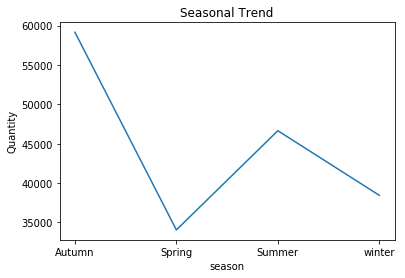

In [240]:
plt.plot(seasonal_df)
plt.title('Seasonal Trend')
plt.xlabel('season')
plt.ylabel('Quantity')
plt.show()

In [284]:
#Question 2.2
inv_df=f[['Sub.Category','season','Quantity']]
inv_df=inv_df.groupby(['Sub.Category','season']).agg({'Quantity':['sum']})
inv_df=inv_df.stack().reset_index()
inv_df.drop('level_2',axis=1,inplace=True)

In [285]:
inv_df.columns

Index(['Sub.Category', 'season', 'Quantity'], dtype='object')

In [286]:
# the bar location
ind = np.arange(17) #for 17 Sub Categories
width=0.15

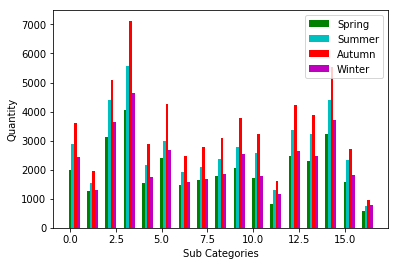

In [293]:
#bar(left, height, width, color, align, yerr)
Spring=list(inv_df[inv_df['season']=='Spring'].Quantity)
Summer=list(inv_df[inv_df['season']=='Summer'].Quantity)
Autumn=list(inv_df[inv_df['season']=='Autumn'].Quantity)
Winter=list(inv_df[inv_df['season']=='Winter'].Quantity)
plt.bar(ind,Spring,width,color='g',label='Spring')
plt.bar(ind+width,Summer,width,color='c',label='Summer')
plt.bar(ind+2*width,Autumn,width,color='r',label='Autumn')
plt.bar(ind+3*width,Winter,width,color='m',label='Winter')
plt.legend(loc="upper right")
plt.xlabel('Sub Categories')
plt.ylabel('Quantity')
plt.show()